# Oscillations in Glycolysis

model of Selkov (1968)

x: fructose-1,6-bisphosphate and ADP

y: fructose-6-phosphate and ATP


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### define flow

In [2]:
def flowx(x,y,a,b):
    return -x + (a+x*x)*y

In [3]:
def flowy(x,y,a,b):
    return b - (a+x*x)*y

In [4]:
def flow(y, t, a, b):
    dx = flowx(y[0],y[1],a,b)
    dy = flowy(y[0],y[1],a,b)
    
    return [dx, dy]

### generate and plot data:
#### a. Flow profile

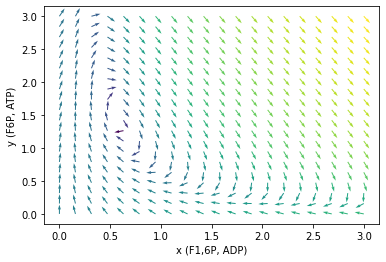

In [5]:
a=0.08; b=0.6
#a=0.16;b=0.6

x = np.linspace(0,3,20)
y = np.linspace(0,3,20)

X,Y = np.meshgrid(x,y)

DX = flowx(X,Y,a,b)
DY = flowy(X,Y,a,b)

#plot flow with normalized arrow length
N = np.sqrt(DX**2 + DY**2)
N[N==0] = np.nan
plt.quiver(X, Y, DX/N, DY/N, np.log(N))
plt.xlabel("x (F1,6P, ADP)")
plt.ylabel("y (F6P, ATP)");

include nullclines

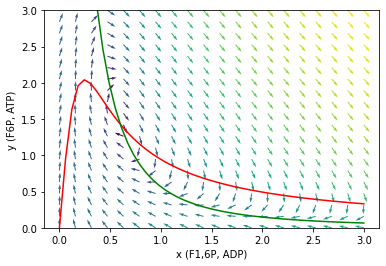

In [8]:
a=0.06; b=0.6
#a=0.16;b=0.6

x = np.linspace(0,3,20)
y = np.linspace(0,3,20)

X,Y = np.meshgrid(x,y)

DX = flowx(X,Y,a,b)
DY = flowy(X,Y,a,b)

#generate nullclines
x1 = np.linspace(0,3,50)
nc1= x1/(a+x1*x1)
nc2=b/(a+x1*x1)

#plot flow with normalized arrow length
N = np.sqrt(DX**2 + DY**2)
N[N==0] = np.nan
plt.quiver(X, Y, DX/N, DY/N, np.log(N))
plt.plot(x1,nc1,color='r')
plt.plot(x1,nc2,color='g')
plt.ylim((0,3))
plt.xlabel("x (F1,6P, ADP)")
plt.ylabel("y (F6P, ATP)");

#### b. Trajectories in phase space

In [9]:
from scipy.integrate import odeint

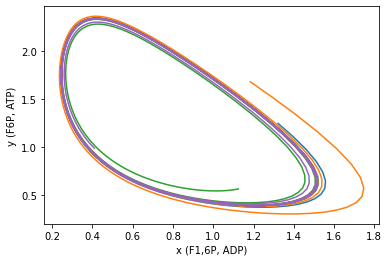

In [14]:
# try a=0.08, b=0.6 and a=.16;b=0.6
a=0.08; b=0.6

t = np.linspace(0,50,600)

for i in range(5):
    y0 = np.random.rand(2)*2
    y = odeint(flow, y0, t, (a,b))
    plt.plot(y[:,0], y[:,1])
plt.xlabel("x (F1,6P, ADP)")
plt.ylabel("y (F6P, ATP)");

#### c. Time dependence of variable

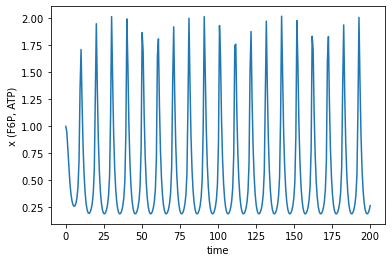

In [15]:
a=0.06; b=0.6

y0 = [1, 1]
t = np.linspace(0,200,300)
y = odeint(flow, y0, t, (a,b))
plt.plot(t,y[:,0])
plt.xlabel("time")
plt.ylabel("x (F6P, ATP)");



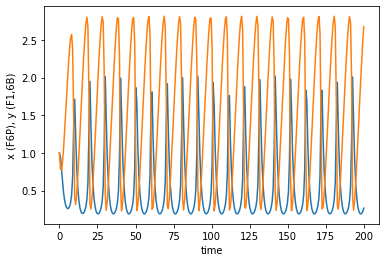

In [16]:
plt.plot(t,y)
plt.xlabel("time")
plt.ylabel("x (F6P), y (F1,6B)");